In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import io
import pandas as pd

text = "historical_automobile_sales.csv"
df = pd.read_csv(text)

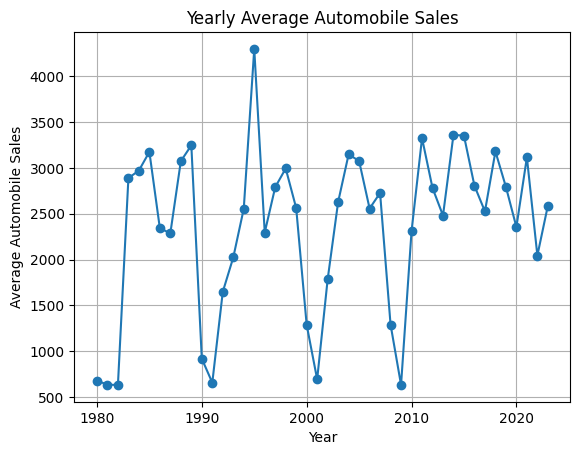

In [14]:
df.groupby('Year')['Automobile_Sales'].mean().plot(kind='line', marker='o', title='Yearly Average Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.grid(True)
plt.show()

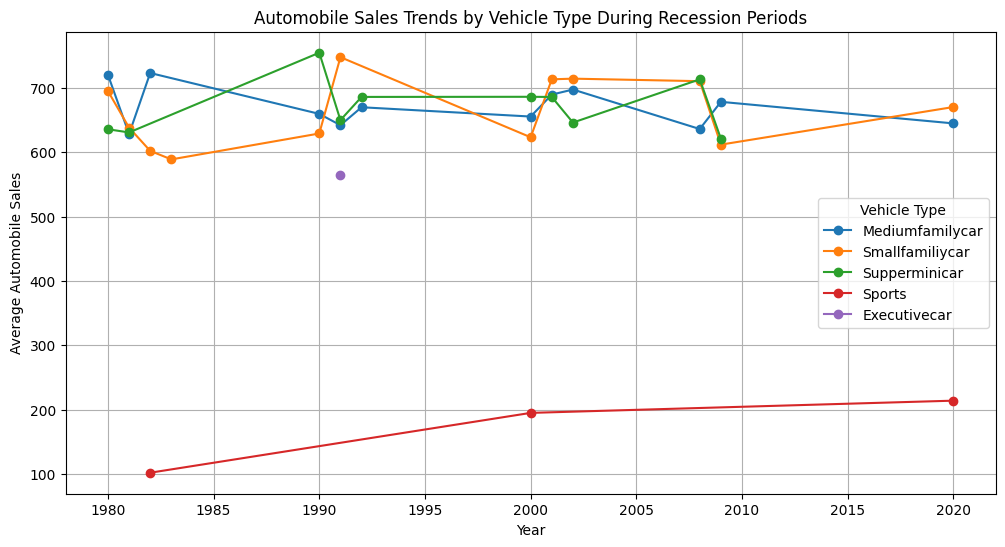

In [15]:
# Filter data for recession periods
recession_df = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type, then calculate mean sales
vehicle_sales = recession_df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for vtype in vehicle_sales['Vehicle_Type'].unique():
    subset = vehicle_sales[vehicle_sales['Vehicle_Type'] == vtype]
    plt.plot(subset['Year'], subset['Automobile_Sales'], marker='o', label=vtype)

plt.title('Automobile Sales Trends by Vehicle Type During Recession Periods')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

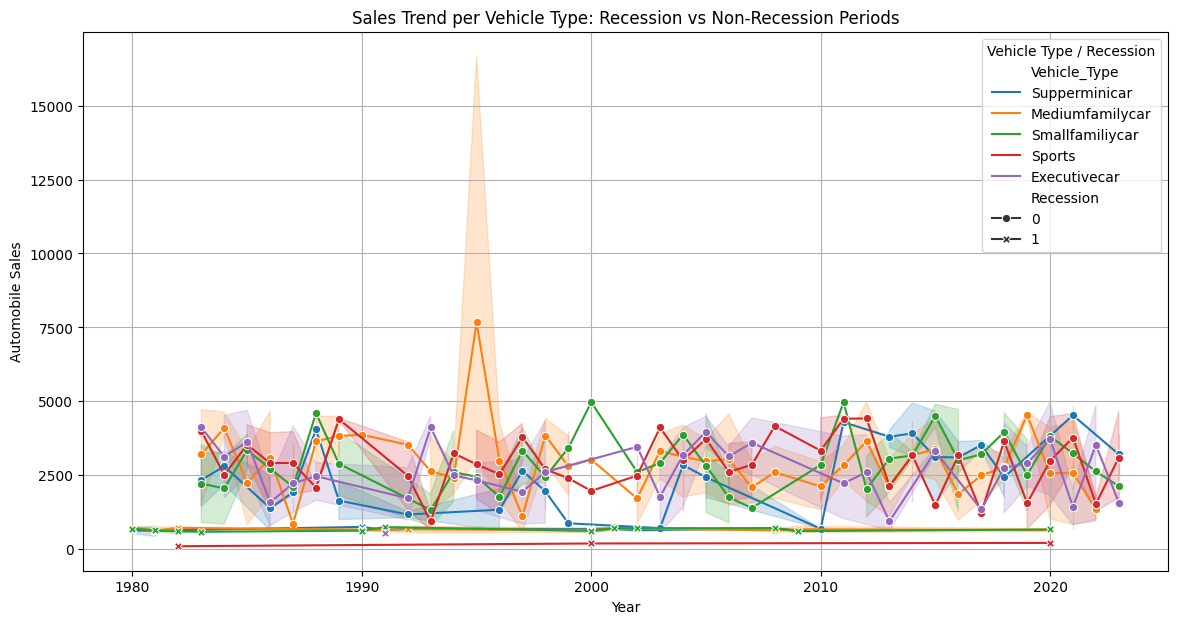

In [16]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df,
    x='Year',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    style='Recession',
    markers=True,
    dashes=False
)
plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type / Recession')
plt.grid(True)
plt.show()

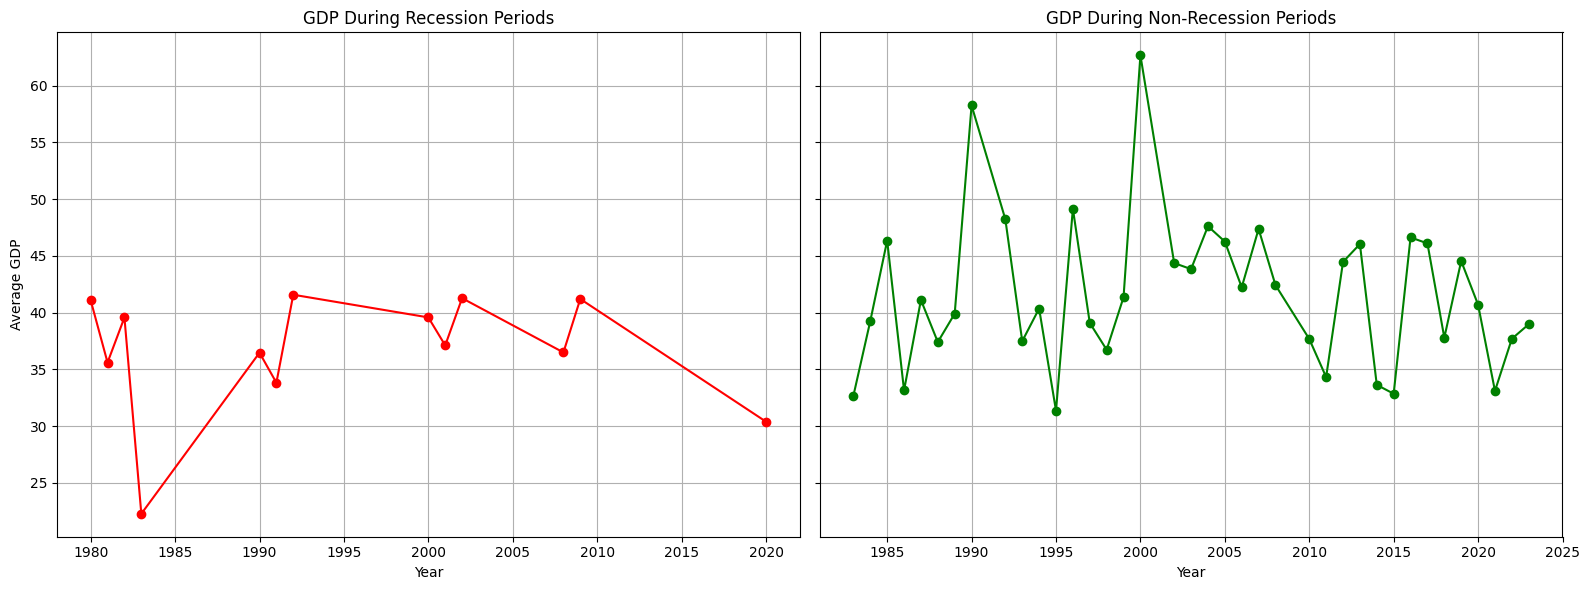

In [17]:
# Create two subsets: recession and non-recession
gdp_recession = df[df['Recession'] == 1].groupby('Year')['GDP'].mean().reset_index()
gdp_non_recession = df[df['Recession'] == 0].groupby('Year')['GDP'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# GDP during recession
axes[0].plot(gdp_recession['Year'], gdp_recession['GDP'], marker='o', color='red')
axes[0].set_title('GDP During Recession Periods')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average GDP')
axes[0].grid(True)

# GDP during non-recession
axes[1].plot(gdp_non_recession['Year'], gdp_non_recession['GDP'], marker='o', color='green')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].set_xlabel('Year')
axes[1].grid(True)

plt.tight_layout()
plt.show()

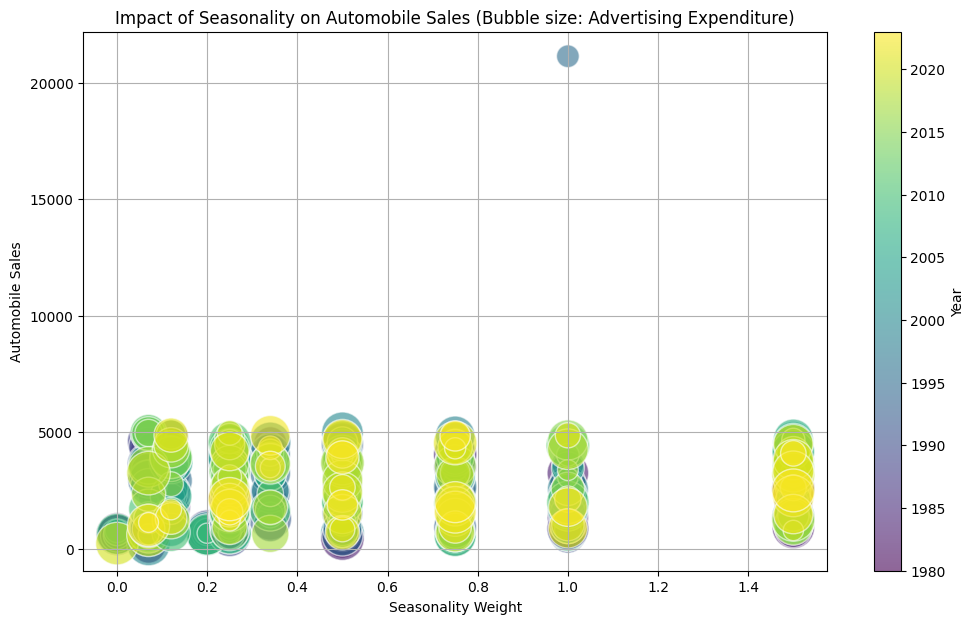

In [18]:
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df['Seasonality_Weight'],
    df['Automobile_Sales'],
    s=df['Advertising_Expenditure'] / 5,  # Bubble size scaled by ad expenditure
    c=df['Year'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w'
)
plt.xlabel('Seasonality Weight')
plt.ylabel('Automobile Sales')
plt.title('Impact of Seasonality on Automobile Sales (Bubble size: Advertising Expenditure)')
cbar = plt.colorbar(scatter)
cbar.set_label('Year')
plt.grid(True)
plt.show()

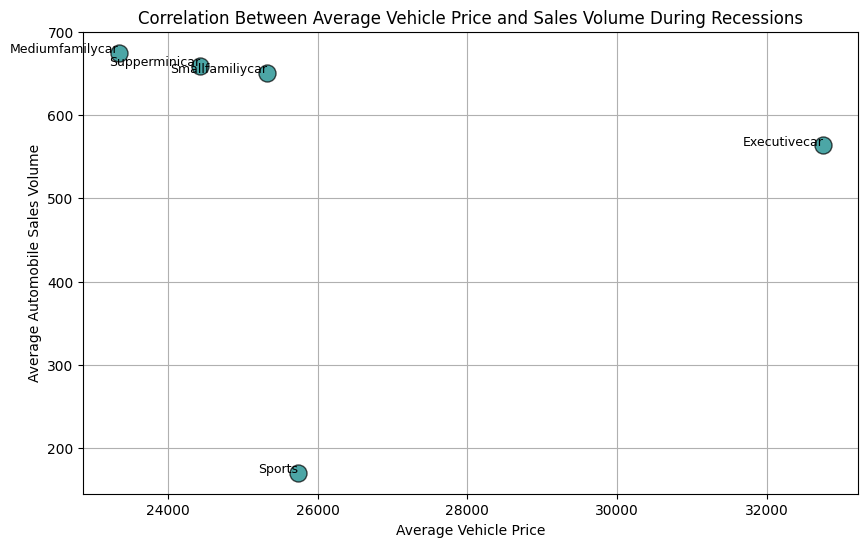

In [19]:
# Calculate average vehicle price and sales volume by vehicle type during recessions
avg_price_sales = recession_df.groupby('Vehicle_Type').agg({
    'Price': 'mean',
    'Automobile_Sales': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(
    avg_price_sales['Price'],
    avg_price_sales['Automobile_Sales'],
    s=150,
    alpha=0.7,
    c='teal',
    edgecolors='k'
)
for i, row in avg_price_sales.iterrows():
    plt.text(row['Price'], row['Automobile_Sales'], row['Vehicle_Type'], fontsize=9, ha='right')

plt.title('Correlation Between Average Vehicle Price and Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Average Automobile Sales Volume')
plt.grid(True)
plt.show()

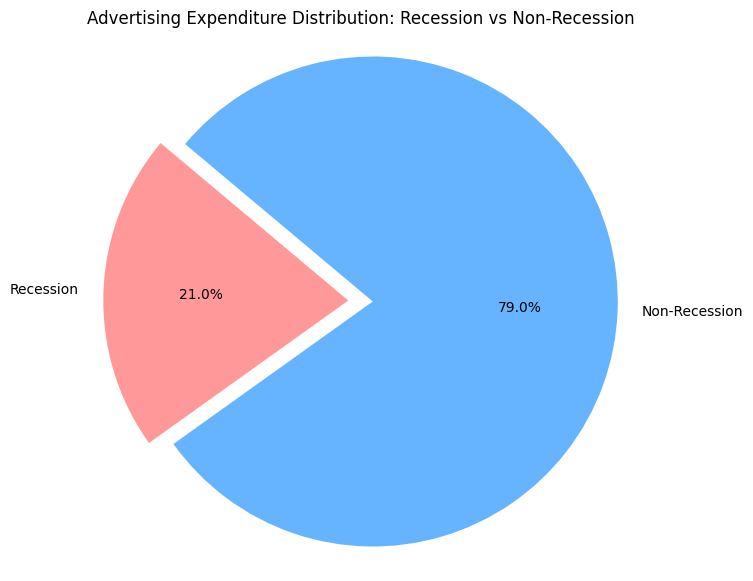

In [20]:
# Calculate total advertising expenditure by period
ad_exp_recession = recession_df['Advertising_Expenditure'].sum()
ad_exp_non_recession = df[df['Recession'] == 0]['Advertising_Expenditure'].sum()

# Prepare data for pie chart
labels = ['Recession', 'Non-Recession']
sizes = [ad_exp_recession, ad_exp_non_recession]
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0.05))
plt.title('Advertising Expenditure Distribution: Recession vs Non-Recession')
plt.axis('equal')
plt.show()

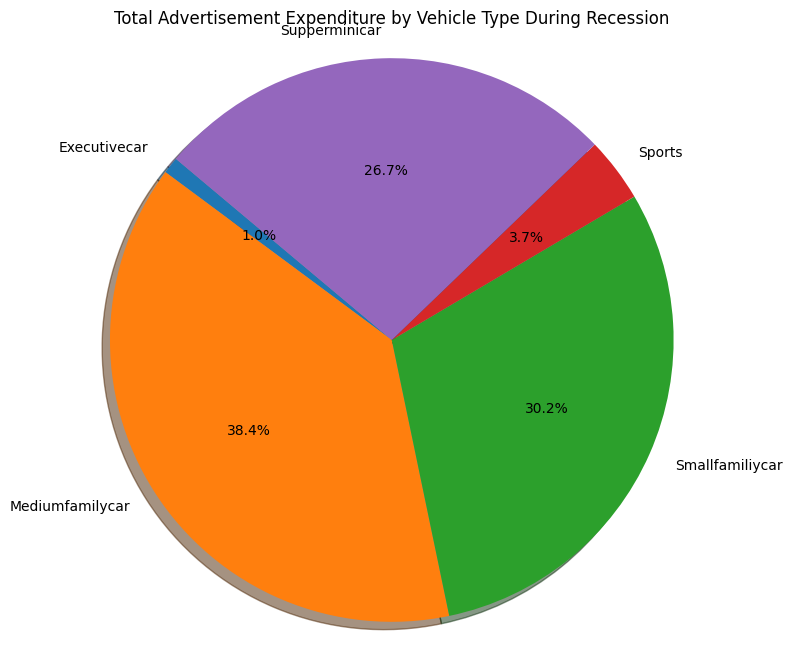

In [21]:
# Group the recession data by Vehicle_Type and sum the Advertising_Expenditure
ad_exp_by_vehicle = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    ad_exp_by_vehicle,
    labels=ad_exp_by_vehicle.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Total Advertisement Expenditure by Vehicle Type During Recession')
plt.axis('equal')
plt.show()

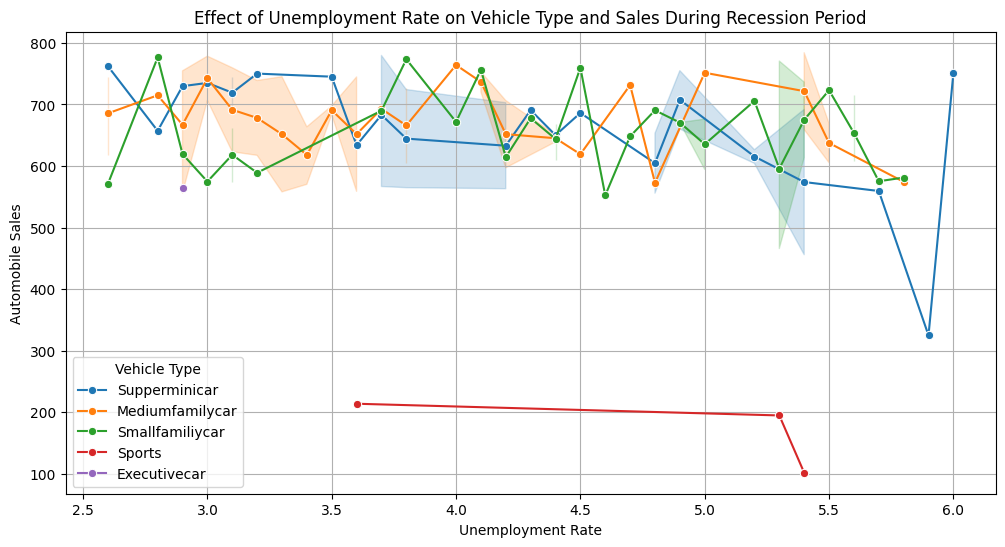

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=recession_df,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    marker='o'
)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales During Recession Period')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

In [ ]:
import dash
import more_itertools
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import io
import pandas as pd

text = "historical_automobile_sales.csv"
data = pd.read_csv(text)

In [ ]:
html.H1(
    "Automobile Sales Statistics Dashboard",
    style={'textAlign': 'center', 'color': '#503D36', 'font-size': 24}
)

In [ ]:
# 选择报告类型下拉菜单
dcc.Dropdown(
    id='dropdown-statistics',
    options=[
        {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
        {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
    ],
    value='Select Statistics',
    placeholder='Select a report type',
    style={'width': '80%', 'padding': '3px', 'fontSize': 20, 'textAlign': 'center'}
)

# 选择年份下拉菜单
dcc.Dropdown(
    id='select-year',
    options=[{'label': i, 'value': i} for i in year_list],
    value='Select-year',
    placeholder='Select-year',
    style={'width': '80%', 'padding': '3px', 'fontSize': 20, 'textAlign': 'center'}
)

In [ ]:
html.Div([
    html.Div(id='output-container', className='chart-grid', style={'display': 'flex'}),
])

In [ ]:
from dash.dependencies import Input, Output

# 回调：根据统计类型启用/禁用年份下拉菜单
@app.callback(
    Output(component_id='select-year', component_property='disabled'),
    Input(component_id='dropdown-statistics', component_property='value')
)
def update_input_container(selected_statistics):
    if selected_statistics == 'Yearly Statistics':
        return False
    else:
        return True

# 回调：根据统计类型和年份更新输出容器
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_container(selected_statistics, input_year):
    if selected_statistics == 'Recession Period Statistics':
        recession_data = data[data['Recession'] == 1]
        # 这里可以继续添加图表生成逻辑
        return [html.Div("Recession Period Statistics 图表区域")]
    elif input_year and selected_statistics == 'Yearly Statistics':
        yearly_data = data[data['Year'] == int(input_year)]
        # 这里可以继续添加图表生成逻辑
        return [html.Div("Yearly Statistics 图表区域")]
    else:
        return None

In [ ]:
# 经济衰退报告统计数据的图表生成

# 仅选择经济衰退期间的数据
recession_data = data[data['Recession'] == 1]

# Plot 1: 汽车销量在经济衰退期间（按年份）波动（折线图）
yearly_rec = recession_data.groupby('Year')['Automobile_Sales'].mean().reset_index()
R_chart1 = dcc.Graph(
    figure=px.line(
        yearly_rec,
        x='Year',
        y='Automobile_Sales',
        title="Average Automobile Sales Fluctuation Over Recession Period"
    )
)

# Plot 2: 按车型计算平均汽车销量（柱状图）
average_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
R_chart2 = dcc.Graph(
    figure=px.bar(
        average_sales,
        x='Vehicle_Type',
        y='Automobile_Sales',
        title="Average Number of Vehicles Sold by Vehicle Type During Recession"
    )
)

# Plot 3: 经济衰退期间各车型广告支出占比（饼图）
exp_rec = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
R_chart3 = dcc.Graph(
    figure=px.pie(
        exp_rec,
        values='Advertising_Expenditure',
        names='Vehicle_Type',
        title="Total Advertising Expenditure Share by Vehicle Type During Recession"
    )
)

# Plot 4: 失业率对车型和销量的影响（分组柱状图）
unemp_data = recession_data.groupby(['unemployment_rate', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
R_chart4 = dcc.Graph(
    figure=px.bar(
        unemp_data,
        x='unemployment_rate',
        y='Automobile_Sales',
        color='Vehicle_Type',
        labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales'},
        title='Effect of Unemployment Rate on Vehicle Type and Sales'
    )
)

# 返回图表布局
charts = [
    html.Div(className='chart-item', children=[html.Div(children=R_chart1), html.Div(children=R_chart2)], style={'display': 'flex'}),
    html.Div(className='chart-item', children=[html.Div(children=R_chart3), html.Div(children=R_chart4)], style={'display': 'flex'})
]

In [ ]:
# 年度报告统计图表的创建与显示

# 检查是否为年度统计报告
if input_year and selected_statistics == 'Yearly Statistics':
    yearly_data = data[data['Year'] == int(input_year)]

    # Plot 1: 全时期年度汽车销量折线图
    yas = data.groupby('Year')['Automobile_Sales'].mean().reset_index()
    Y_chart1 = dcc.Graph(
        figure=px.line(
            yas,
            x='Year',
            y='Automobile_Sales',
            title='Average Yearly Automobile Sales'
        )
    )

    # Plot 2: 全时期月度汽车总销量折线图
    mas = data.groupby('Month')['Automobile_Sales'].sum().reset_index()
    Y_chart2 = dcc.Graph(
        figure=px.line(
            mas,
            x='Month',
            y='Automobile_Sales',
            title='Total Monthly Automobile Sales'
        )
    )

    # Plot 3: 指定年份各车型平均销量柱状图
    avr_vdata = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
    Y_chart3 = dcc.Graph(
        figure=px.bar(
            avr_vdata,
            x='Vehicle_Type',
            y='Automobile_Sales',
            title='Average Vehicles Sold by Vehicle Type in the year {}'.format(input_year)
        )
    )

    # Plot 4: 指定年份各车型广告支出饼图
    exp_data = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
    Y_chart4 = dcc.Graph(
        figure=px.pie(
            exp_data,
            values='Advertising_Expenditure',
            names='Vehicle_Type',
            title='Total Advertisement Expenditure for Each Vehicle'
        )
    )

    # 返回图表布局
    charts = [
        html.Div(className='chart-item', children=[html.Div(children=Y_chart1), html.Div(children=Y_chart2)], style={'display': 'flex'}),
        html.Div(className='chart-item', children=[html.Div(children=Y_chart3), html.Div(children=Y_chart4)], style={'display': 'flex'})
    ]